<h1>Simple is good: Text classification with Naïve Bayes</h1>


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from string import punctuation
import nltk


<h1>Machine Learning kan være simpelt: Text-classificering med Naïve Bayes</h1>
<p>Alle der interesserer sig for kunstig intelligens går for tiden og bliver benovet over, hvordan Dall-E kan generere fuldstændigt nye billeder på kommando. Men selvom det <i>virkelig</i> er imponerende, at machine learning kan generere et hyperrealistisk billede af en astronaut, der ridder i rummet på en hest, så kan machine learning også utroligt mange andre ting, som er brugbare i dagligdagen på arbejdspladsen.</p>
<p>Én af de mere jordnære ting, som kan være brugbar for mange, er classificering. Classificering er når man får en machine-learning-model til at forudsige/beregne, hvilken kategori et givet input skal have.<br>
Det er der utroligt mange anvendelser til. I medieverdenen, som jeg arbejder i, bruger vi det for eksempel til at sætte kategorier på artikler. Konkret  læser en machinelearningmoddel fx en artikeltekst og giver den kateogierne "Erhverv, Maersk og Regnskaber".
<p>

<h2>Forudsig en jobkateogri ud fra en overskrift på en jobannonce</h2>
I det her tænkte eksempel vil vi bruge en af de mest simple, men overraskende effektive, maskinlæringsmetoder til at forsige hvilken jobkategori en jobannonce skal tilhøre kun ved at læse overskriften på en jobannonce.

<p>Metoden vi bruger hedder Naïve Bayes og motoren i den metode baserer sig på statistik. Matematikken skal jeg spare jer for. Men det er meget nyttigt at vide, hvordan det virker. Metoden Naive Bayes er i den subkategori af machine learning som hedder "Supervised learning" det hedder sådan, fordi modellen træner på data som allerede har fået tildelt kategorier. Kategorierne kalder vi fremover "labels". Naive Bayes modellen ser så på frekvensen af hvert enkelt ord i de forskellige overskrifter samt den rigtige label. Når der er nok data, så begynder der at tegne sig et godt statistisk billede af, hvilke tekster skal have hvilke kategorier.</p>.
<p>
Til formålet har jeg scrapet jobannoncer og indsamlet annoncens overskrift samt hvilken jobkategori den tilhører. I det her eksempel har vi 20 forskellige kategorier.
Det bør være nok til at lave en model, som kan forudsige med nogenlunde præcision, hvilken kategori en ukendt jobannoncetitel skal have.</p>

<h2> Trin 1: Forbered data</h2>

<p>Det første vi gør med ethvert datasæt er en smule eksplorativ analyse. Vi vil gerne have et overblik over, hvor godt vores dataset egentlig passer til opgaven.</p>
<p>Som sagt har 20 kategorier. Det første vi undersøger er om alle 20 kategorier er repræsenteret i datasettet.</p>


In [11]:
def count_categories_in_dataset(categories):
    count_dict = {}
    for category in categories:
        if category in count_dict:
            count_dict[category] += 1
            continue
        
        count_dict[category] = 1

    return count_dict
    

# df = pd.read_csv('jobs.csv',delimiter=',')
# print(count_categories_in_dataset(df['job_category']))
df = pd.read_csv('jobdataFull.csv',delimiter=',')
df.dropna()

# delete rows without a category
df = df[df.job_category.notnull()]

#How many of each category is there in the dataset?
count = count_categories_in_dataset(df['job_category'])


{'JC22': 17953, 'JC16': 22974, 'JC5': 2452, 'JC9': 14987, 'JC7': 6280, 'JC11': 5816, 'JC15': 663, 'JC19': 5642, 'JC20': 8573, 'JC12': 2052, 'JC17': 3768, 'JC6': 4533, 'JC18': 4379, 'JC14': 4005, 'JC3': 509, 'JC21': 1934, 'JC4': 322, 'JC8': 346, 'JC10': 87, 'JC2': 192, 'JC1': 22, 'JC13': 22}


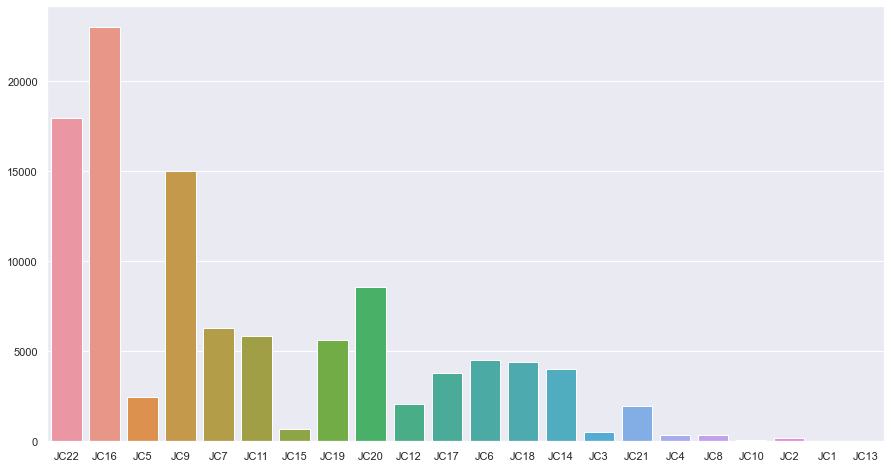

In [12]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(list(count.keys()), list(count.values()))
print(count)

In [14]:
# Helper functions to clean the data.

def getTokens(s):
    words = nltk.word_tokenize(s)
    words = [word.lower() for word in words if word.isalpha()]
    
    return words

#Method that removes irrelevant words defined beforehand in a list
#takes an array of words.
def remove_stop_words(words):
    with open('stopwords.txt') as f:
        stopwords = f.read().splitlines()
        return [w for w in words if w not in stopwords]

        
def remove_punctuation(s):
    global punctuation
    for p in punctuation:
        s = s.replace('-',' ')
        s = s.replace('/',' ')
        s = s.replace(p, '')
        s = s.replace('¨','')
    return s

def word_roots(words,wdf): 
    result = []
    for word in words:
        #Find the row, where the word is.
        row = wdf.loc[wdf['inflection']==word]
        if len(row):
            #The lemma of the word is in the first column
            lemma = row.iloc[0]['root'].replace('1. ', '') \
                                       .replace('2. ', '') \
                                       .replace('3. ', '')
            result.append(lemma)
        else:
            result.append(word)
    return result


In [15]:
df['clean_title'] = df['job_title'].map(remove_punctuation)
df['clean_title'] = df['clean_title'].map(getTokens)
df['clean_title'] = df['clean_title'].map(remove_stop_words)

#This takes a very long time because of the inefficient algorithm, that runs in numWords X numWordsInDanishLanguage.
wdf = pd.read_csv('fuldformer.txt', delimiter=';', names=["root","inflection","gender"])
df['clean_title'] = df['clean_title'].map(lambda words: word_roots(words,wdf))
df['clean_title'] = df['clean_title'].map(lambda words: " ".join(words))


In [17]:
df.head()


,job_id,job_title,job_beskrivelse,job_category,clean_title
0,97052,Analytisk stærk special- eller chefkonsulent t...,<em>Er du analytisk stærk og nytænkende? Kan d...,JC22,analytisk stærk special chefkonsulent politiku...
1,98374,Engageret nattevagt til demenscenter Skovgårde...,<strong>Social- og sundhedsassistent / Social-...,JC16,engagere nattevagt demenscenter skovgården had...
2,98525,Superbruger til Master Cater og forretningsmæs...,<strong>Er du en udviklings- og samarbejdsorie...,JC5,superbruger mast cater forretningsmæssig it sy...
3,99343,"Medarbejder til Tværgående Team Daghjemmene, ...",Stillingen er på 32 timer ugentlig i dagvagt m...,JC16,medarbejder tværgående team daghjem solgården ...
5,101218,"Mariehønens videbegærlige, kreative og dejlige...",<strong>Vil du være en del af en personalegrup...,JC9,mariehøne videbegærlig kreativ dejlig barn man...


In [18]:
df.to_csv('final_jobdata.csv', index=False)


              precision    recall  f1-score   support

         JC1       0.00      0.00      0.00         4
        JC10       0.00      0.00      0.00        17
        JC11       0.83      0.77      0.80      1167
        JC12       0.80      0.48      0.60       414
        JC13       0.00      0.00      0.00         3
        JC14       0.83      0.79      0.81       800
        JC15       1.00      0.16      0.28       136
        JC16       0.84      0.94      0.89      4596
        JC17       0.85      0.78      0.81       790
        JC18       0.79      0.52      0.63       854
        JC19       0.83      0.51      0.63      1108
         JC2       1.00      0.10      0.18        41
        JC20       0.77      0.90      0.83      1641
        JC21       0.97      0.52      0.68       413
        JC22       0.73      0.86      0.79      3643
         JC3       0.94      0.31      0.47       100
         JC4       1.00      0.09      0.16        70
         JC5       0.73    

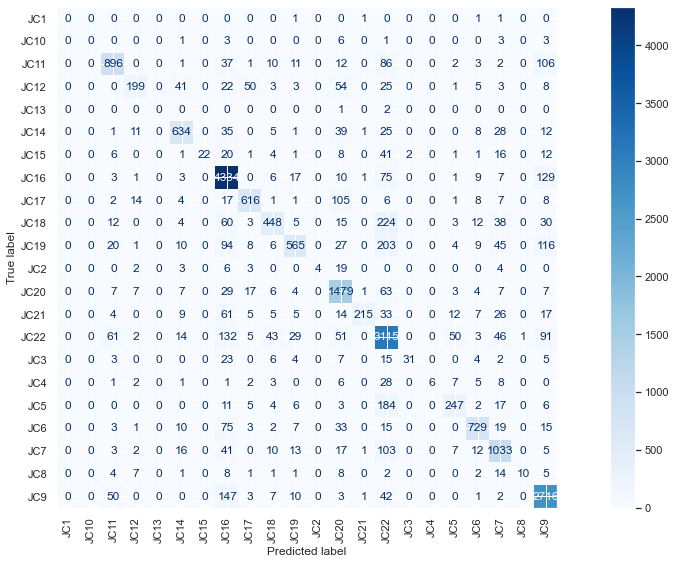

In [19]:
#NU kan vi begynde machine learning.
X = np.array(df.loc[:, 'clean_title'])
y = np.array(df.loc[:, 'job_category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
nb_mult_model = MultinomialNB().fit(X_train_counts, y_train)
predicted = nb_mult_model.predict(X_test_counts)

print(classification_report(y_test, predicted))
plot_confusion_matrix(nb_mult_model, 
                      X_test_counts, y_test,
                      cmap=plt.cm.Blues,
                      xticks_rotation='vertical')
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = 40,30
plt.tight_layout()
plt.show()